# YOLOv5

https://m.blog.daum.net/geoscience/1646?category=7023

In [1]:
# Python 버전 확인
import sys
print(sys.version)

3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]


In [2]:
# PyTorch 버전 확인
import torch
print(torch.__version__)

1.9.0+cu111


In [3]:
# YOLOv5 종속 항목 설치
!pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

     |████████████████████████████████| 596 kB 1.8 MB/s 


In [4]:
# 모델
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip


requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


YOLOv5 🚀 2021-11-4 torch 1.9.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)




requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



  0%|          | 0.00/14.0M [00:00<?, ?B/s]

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [5]:
# 테스트이미지 업로드
from google.colab import files
files.upload()

Saving test.jpg to test.jpg


{'test.jpg': b'\xff\xd8\xff\xe1\x19mExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x0c\x01\x00\x00\x03\x00\x00\x00\x01\x048\x00\x00\x01\x01\x00\x03\x00\x00\x00\x01\x02\x9f\x00\x00\x01\x02\x00\x03\x00\x00\x00\x03\x00\x00\x00\x9e\x01\x06\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x01\x15\x00\x03\x00\x00\x00\x01\x00\x03\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00\xa4\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00\xac\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x011\x00\x02\x00\x00\x00!\x00\x00\x00\xb4\x012\x00\x02\x00\x00\x00\x14\x00\x00\x00\xd5\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00\xec\x00\x00\x01$\x00\x08\x00\x08\x00\x08\x00\n\xfc\x80\x00\x00\'\x10\x00\n\xfc\x80\x00\x00\'\x10Adobe Photoshop 21.2 (Macintosh)\x002020:07:06 13:34:20\x00\x00\x00\x00\x00\x04\x90\x00\x00\x07\x00\x00\x00\x040231\xa0\x01\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\xa0\x02\x00\x04\x00\x00\x00\x01\x00\x00\x03\x84\xa0\x03\x00\x04\x00\x00\x00\x01\x00\x00\x03\x84\x00\x00\x0

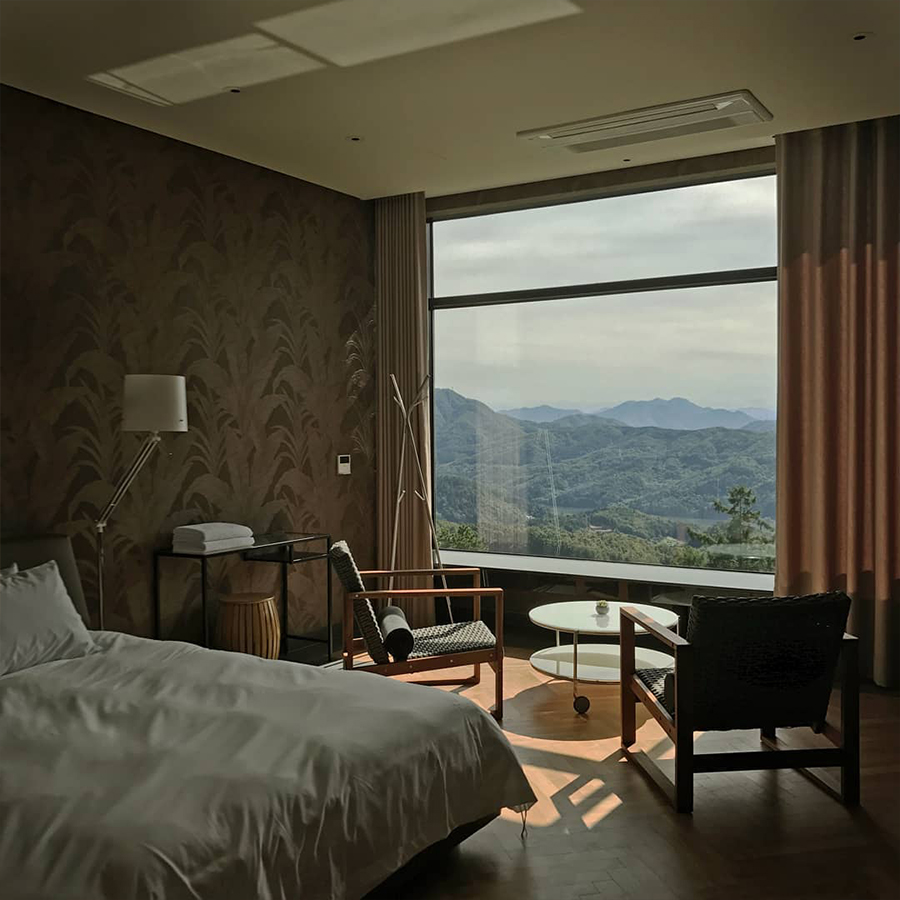

In [11]:
from IPython.display import Image, clear_output 
Image(filename='test.jpg', width=600)

In [7]:
# 이미지
img = ['test.jpg']

# 추론
results = model(img)

# 결과
results.print()
results.show()
results.save() 
# Save image to 'runs\detect\exp'

results.xyxy[0]  # 예측 (tensor)
results.pandas().xyxy[0]  # 예측 (pandas)

image 1/1: 900x900 2 chairs, 1 bed, 1 dining table
Speed: 25.2ms pre-process, 9.2ms inference, 1.2ms NMS per image at shape (1, 3, 640, 640)
Saved 1 image to runs/detect/exp


,xmin,ymin,xmax,ymax,confidence,class,name
0,326.953125,540.000000,506.250000,721.406250,0.868652,56,chair
1,621.210938,589.218750,861.328125,827.578125,0.855469,56,chair
2,0.000000,508.359375,540.703125,897.187500,0.757324,59,bed
3,525.234375,599.062500,682.031250,739.687500,0.292236,60,dining table


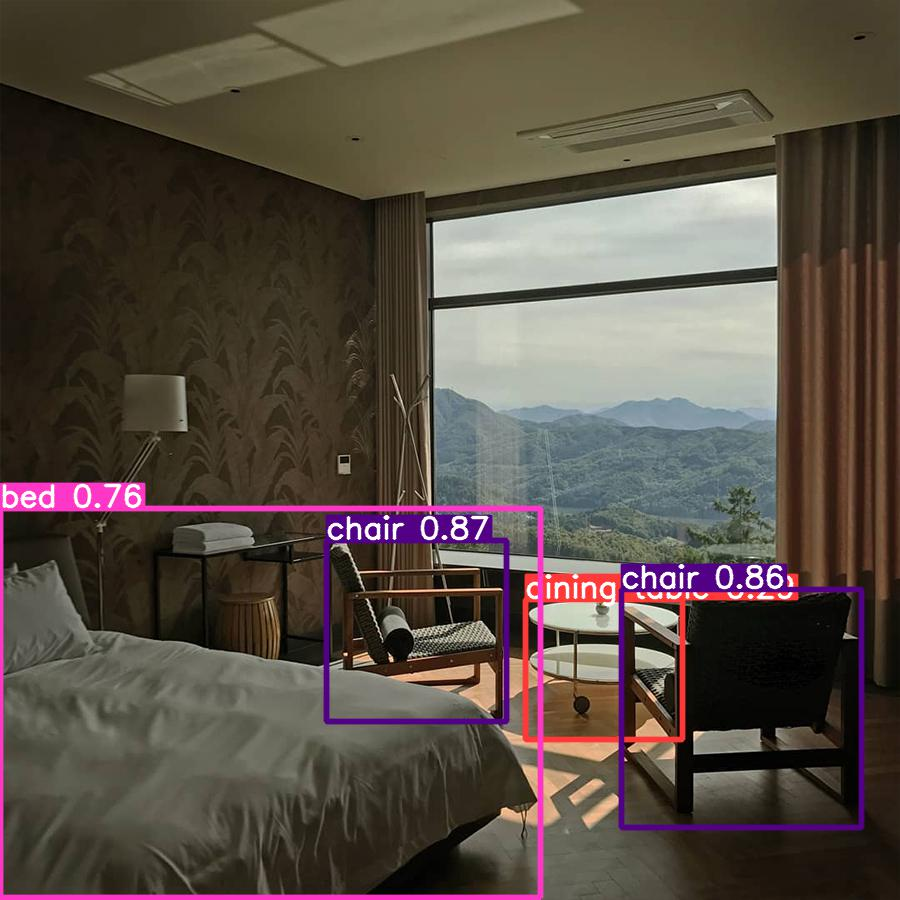

In [10]:
from IPython.display import Image, clear_output 
Image(filename='runs/detect/exp/test.jpg', width=600)

In [ ]:
model.save('yolo.h5')